In [80]:
%matplotlib inline

import pandas as pd
import csv as csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.svm import LinearSVC

In [81]:
iot_data = pd.read_csv('wimp_weather.csv', index_col = 17, parse_dates = True)
iot_data.head()

,measurementTime,winddir,windspeedmph,windgustmph,windgustdir,windspdmph_avg2m,winddir_avg2m,windgustmph_10m,windgustdir_10m,humidity,tempf,rainin,dailyrainin,baromin,dewptf,batt_lvl,light_lvl
timestamp,,,,,,,,,,,,,,,,,
2015-10-27 10:29:58.457000,04:29:57 AM,45,0.0,8.7,270,0.0,45,3.2,315,65.4,44.2,0,0.03,29.9456,33.0199,4.09,0
2015-10-27 10:28:56.967000,04:28:56 AM,45,0.0,8.7,270,0.5,19,3.2,315,65.3,44.4,0,0.03,29.9475,33.0199,4.09,0
2015-10-27 10:28:20.067000,04:27:54 AM,0,0.0,8.7,270,1.1,336,3.2,315,65.6,44.4,0,0.03,29.9479,33.0199,4.09,0
2015-10-27 10:26:53.279000,04:26:53 AM,315,1.5,8.7,270,0.7,325,3.2,315,64.8,44.5,0,0.03,29.9478,32.6350,4.09,0
2015-10-27 10:26:13.432000,04:25:51 AM,315,0.0,8.7,270,0.1,347,1.6,315,65.7,44.6,0,0.03,29.9484,33.0199,4.09,0


In [82]:
iot_data.humidity[0:10]    # Same as above syntax

timestamp
2015-10-27 10:29:58.457000    65.4
2015-10-27 10:28:56.967000    65.3
2015-10-27 10:28:20.067000    65.6
2015-10-27 10:26:53.279000    64.8
2015-10-27 10:26:13.432000    65.7
2015-10-27 10:26:22.529000    65.7
2015-10-27 10:25:06.207000    64.8
2015-10-27 10:23:49.560000    63.5
2015-10-27 10:22:48.319000    62.3
2015-10-27 10:21:46.566000    62.9
Name: humidity, dtype: float64

In [83]:
iot_data.describe()

,winddir,windspeedmph,windgustmph,windgustdir,windspdmph_avg2m,winddir_avg2m,windgustmph_10m,windgustdir_10m,humidity,tempf,rainin,dailyrainin,baromin,dewptf,batt_lvl,light_lvl
count,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000
mean,160.384481,1.552542,13.507850,188.451121,1.182313,116.309271,5.634726,193.811297,44.064367,67.954196,0.172589,2.366516,30.109223,40.971955,4.149557,0.941105
std,102.397275,1.610921,6.267398,111.421528,1.043053,108.626745,3.301661,108.064663,21.812143,12.623482,1.294170,12.031320,0.117360,8.898440,0.074737,1.267020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,33.900000,0.000000,0.000000,29.805200,-8.011100,3.910000,0.000000
25%,90.000000,0.000000,9.700000,90.000000,0.400000,45.000000,3.200000,90.000000,27.700000,59.100000,0.000000,0.000000,30.029700,36.019400,4.110000,0.000000
50%,135.000000,1.500000,12.900000,225.000000,1.000000,76.000000,4.800000,225.000000,40.000000,68.000000,0.000000,0.000000,30.106100,42.000500,4.140000,0.040000
75%,270.000000,2.900000,16.100000,270.000000,1.700000,133.000000,7.300000,270.000000,56.300000,76.700000,0.000000,0.000000,30.194800,47.140600,4.180000,2.030000
max,338.000000,21.800000,43.600000,338.000000,12.700000,359.000000,43.600000,338.000000,99.200000,100.200000,18.900000,111.830000,30.456000,66.872300,4.320000,3.130000


In [84]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117751 entries, 2015-10-27 10:29:58.457000 to 2015-07-23 20:48:44.954000
Data columns (total 17 columns):
measurementTime     117751 non-null object
winddir             117751 non-null int64
windspeedmph        117751 non-null float64
windgustmph         117751 non-null float64
windgustdir         117751 non-null int64
windspdmph_avg2m    117751 non-null float64
winddir_avg2m       117751 non-null int64
windgustmph_10m     117751 non-null float64
windgustdir_10m     117751 non-null int64
humidity            117751 non-null float64
tempf               117751 non-null float64
rainin              117751 non-null float64
dailyrainin         117751 non-null float64
baromin             117751 non-null float64
dewptf              117751 non-null float64
batt_lvl            117751 non-null float64
light_lvl           117751 non-null float64
dtypes: float64(12), int64(4), object(1)

In [85]:
iot_data = iot_data.drop(['measurementTime'], axis = 1)

NameError: name 'title' is not defined

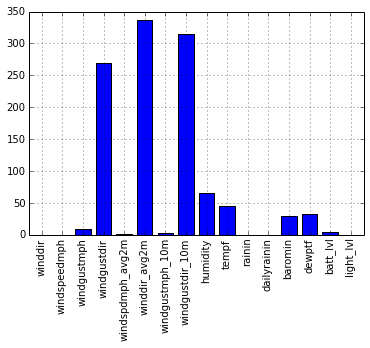

In [86]:
iot_data.ix[2].plot(kind = 'bar')
title('Sensors values %s' % iot_data.index[1])
axhline(0)

In [ ]:
cor = iot_data['dewptf']
cor2 = iot_data['tempf']
cor2

In [ ]:
# scatterplot of that data

plt.scatter(cor2, cor, s = 100, c = 'g')
plt.show

## Data Cleansing

In [ ]:
new_df = iot_data[((iot_data['tempf'] > 90) \
                & (iot_data['humidity'] < 30))]  
new_df.head()

In [ ]:
hum = iot_data[iot_data['humidity'] < 30 ][['humidity']].astype(np.float) 
hum2 = iot_data[iot_data['humidity'] > 80 ][['humidity']].astype(np.float) 
hum2.head(), hum.head()

### Only impute when necessary!!!

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 0, strategy = 'median', axis=0)
imp.fit(iot_data)
imputed = imp.transform(iot_data)
imputed

In [ ]:
transformed_data = imputed

In [ ]:
transformed_data = iot_data.values
transformed_data

In [ ]:
iot_data.tail()

In [ ]:
median = iot_data['windspeedmph'].astype(np.float).median()
median

## Binning (Not Always)

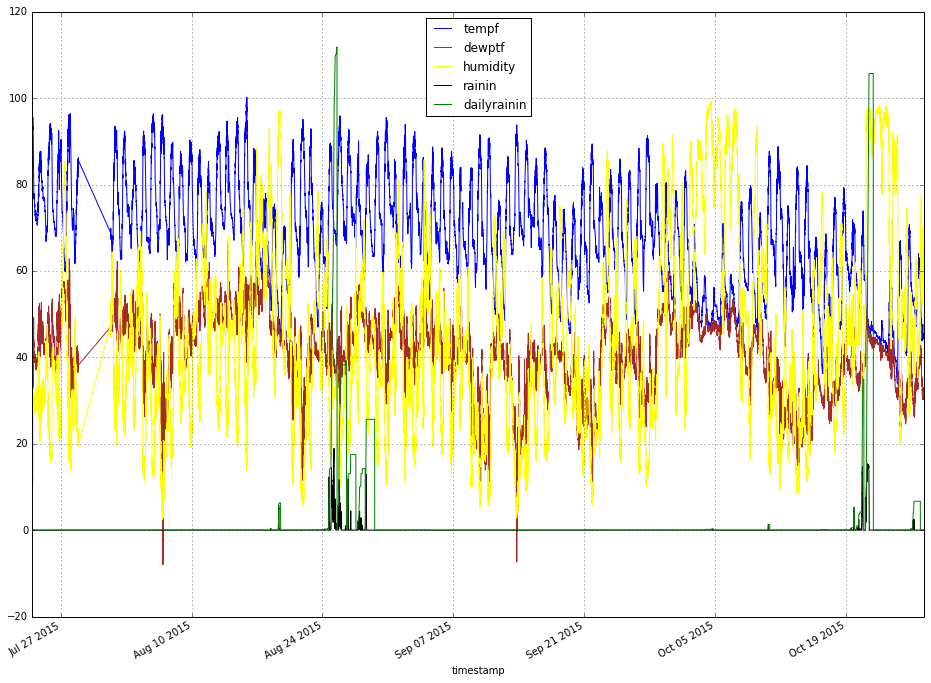

In [114]:
iot_data['tempf'].plot(figsize = (16, 12), legend = 'tempf', color = 'blue')
iot_data['dewptf'].plot(figsize = (16, 12), legend = 'dewptf', color = 'brown')
iot_data['humidity'].plot(figsize = (16, 12), legend = 'humidity', color = 'yellow')
iot_data['rainin'].plot(figsize = (16, 12), legend = 'rainin', color = 'black')
iot_data['dailyrainin'].plot(figsize = (16, 12), legend = 'dailyrainin', color = 'green')

In [41]:
iot_data.describe()

,winddir,windspeedmph,windgustmph,windgustdir,windspdmph_avg2m,winddir_avg2m,windgustmph_10m,windgustdir_10m,humidity,tempf,rainin,dailyrainin,baromin,dewptf,batt_lvl,light_lvl
count,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000,117751.000000
mean,160.384481,1.552542,13.507850,188.451121,1.182313,116.309271,5.634726,193.811297,44.064367,67.954196,0.172589,2.366516,30.109223,40.971955,4.149557,0.941105
std,102.397275,1.610921,6.267398,111.421528,1.043053,108.626745,3.301661,108.064663,21.812143,12.623482,1.294170,12.031320,0.117360,8.898440,0.074737,1.267020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,33.900000,0.000000,0.000000,29.805200,-8.011100,3.910000,0.000000
25%,90.000000,0.000000,9.700000,90.000000,0.400000,45.000000,3.200000,90.000000,27.700000,59.100000,0.000000,0.000000,30.029700,36.019400,4.110000,0.000000
50%,135.000000,1.500000,12.900000,225.000000,1.000000,76.000000,4.800000,225.000000,40.000000,68.000000,0.000000,0.000000,30.106100,42.000500,4.140000,0.040000
75%,270.000000,2.900000,16.100000,270.000000,1.700000,133.000000,7.300000,270.000000,56.300000,76.700000,0.000000,0.000000,30.194800,47.140600,4.180000,2.030000
max,338.000000,21.800000,43.600000,338.000000,12.700000,359.000000,43.600000,338.000000,99.200000,100.200000,18.900000,111.830000,30.456000,66.872300,4.320000,3.130000


In [154]:
test_file = open('wimp_weather1.csv', 'rb')
test_file_object = csv.reader(test_file)
header = test_file_object.next()

In [155]:
prediction_file = open("out_wimp.csv", "wb")
prediction_file_object = csv.writer(prediction_file)

In [156]:
prediction_file_object.writerow(["timestamp", "safety"])
for row in test_file_object:       
    if ('20' <= row[9] < '40') \
    & ('70' <= row[10] < '80'):                           
        prediction_file_object.writerow([row[0],'0'])    # @predict 0 for safest
    elif ('40' <= row[9] < '95') \
    & ('80' <= row[10] < '95'):
        prediction_file_object.writerow([row[0],'1'])    # @predict 1 for danger
    else:                                                       
        prediction_file_object.writerow([row[0],'2'])    # @predict 2 for outlier
test_file.close()
prediction_file.close()

## Data Drying

In [87]:
new_df_transpose = iot_data.transpose()

data_into_dict = new_df_transpose.to_dict()
new_df = [v for k, v in data_into_dict.iteritems()]

In [88]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
transformed_data = dv.fit_transform(new_df).toarray()
transformed_data

array([[  2.98628000e+01,   4.16000000e+00,   0.00000000e+00, ...,
          4.80000000e+00,   9.00000000e-01,   1.60000000e+00],
       [  2.98926000e+01,   3.99000000e+00,   1.00000000e-02, ...,
          4.80000000e+00,   1.00000000e-01,   0.00000000e+00],
       [  3.02140000e+01,   4.15000000e+00,   0.00000000e+00, ...,
          1.80000000e+00,   3.00000000e-01,   0.00000000e+00],
       ..., 
       [  3.00633000e+01,   4.15000000e+00,   0.00000000e+00, ...,
          4.80000000e+00,   9.00000000e-01,   0.00000000e+00],
       [  3.00058000e+01,   4.11000000e+00,   0.00000000e+00, ...,
          1.45000000e+01,   3.20000000e+00,   4.80000000e+00],
       [  3.01888000e+01,   4.09000000e+00,   0.00000000e+00, ...,
          4.80000000e+00,   7.00000000e-01,   2.90000000e+00]])

In [21]:
 len(transformed_data)

117751

In [16]:
target = pd.read_csv('out_wimp.csv', index_col = 0, parse_dates = True)
target.head()

,safety
timestamp,
2015-11-25 04:29:57,0
2015-11-25 04:28:56,0
2015-11-25 04:27:54,0
2015-11-25 04:26:53,0
2015-11-25 04:25:51,0


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transformed_labels = le.fit_transform(target)
transformed_labels

/home/tebogo/.local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:125: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 2, 0])

In [18]:
len(transformed_labels)

117751

## Data Analytics

In [19]:
from sklearn.cross_validation import train_test_split
transformed_data_train, transformed_data_test, transformed_labels_train, transformed_labels_test = train_test_split(transformed_data, transformed_labels)   

In [34]:
# KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
knn = KNeighborsClassifier()
knn.fit(transformed_data_train, transformed_labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
knn.predict(transformed_data_test)

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
transformed_labels_test

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
# DECISION_TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(transformed_data_train, transformed_labels_train)
tree.predict(transformed_data_test)

array([0, 0, 0, ..., 1, 0, 1])

In [40]:
#Lets look at the labels again
transformed_labels_test

array([0, 0, 0, ..., 0, 1, 0])

In [41]:
# Cross Validation
cross_val_score(tree, transformed_data, transformed_labels,  cv = 5)

array([ 0.57532269,  0.56812874,  0.57133758,  0.57586309,  0.57386726])

In [30]:
# NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(transformed_data_train, transformed_labels_train)
gnb.predict(transformed_data_test)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
#Lets look at the labels again
transformed_labels_test

array([0, 0, 0, ..., 0, 1, 0])

In [36]:
from sklearn.cross_validation import cross_val_score
# Cross_validation
cross_val_score(gnb, transformed_data, transformed_labels, cv = 4)

array([ 0.7414654 ,  0.74074326,  0.74033562,  0.74256013])

In [25]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(transformed_data_train,transformed_labels_train)

# Take the same decision trees and run it on the test data
output = forest.predict(transformed_data_test)


In [26]:
scores = cross_val_score(forest, transformed_data_test, transformed_labels_test, cv = 4)
scores.mean()

0.73298741168087367

In [20]:
X = transformed_data_train
y = transformed_labels_train
X

array([[  3.02251000e+01,   4.13000000e+00,   2.50000000e-01, ...,
          5.80000000e+00,   1.40000000e+00,   1.60000000e+00],
       [  3.01626000e+01,   4.19000000e+00,   0.00000000e+00, ...,
          4.80000000e+00,   1.30000000e+00,   1.50000000e+00],
       [  3.03256000e+01,   4.09000000e+00,   1.05700000e+02, ...,
          3.20000000e+00,   3.00000000e-01,   0.00000000e+00],
       ..., 
       [  3.00848000e+01,   4.11000000e+00,   0.00000000e+00, ...,
          1.60000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.01826000e+01,   3.99000000e+00,   0.00000000e+00, ...,
          4.80000000e+00,   8.00000000e-01,   1.50000000e+00],
       [  3.00677000e+01,   3.95000000e+00,   3.00000000e-02, ...,
          2.90000000e+00,   4.00000000e-01,   1.50000000e+00]])

In [ ]:
import numpy
a = numpy.asarray(output1)
numpy.savetxt("safety.csv", a, delimiter=",", header = 'safety')

## Diagnostics¶

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# <!-- collapse=True -->

# Modified from http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/usr/local/lib/python2.7/dist-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=10.0. Return

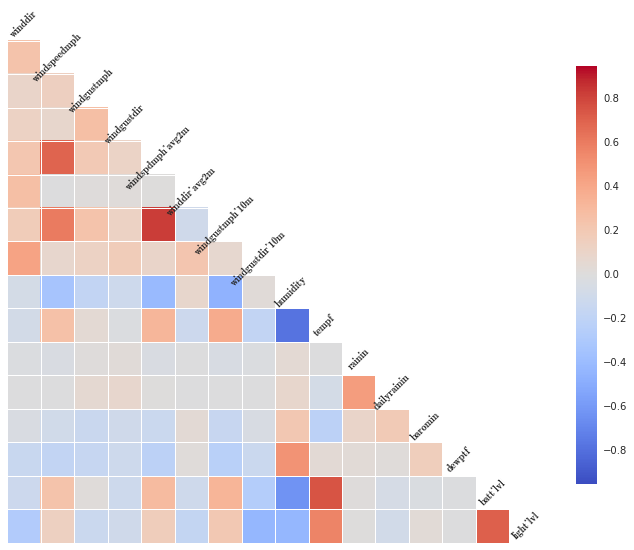

In [29]:
plt.figure(figsize=(12, 10))
_ = sns.corrplot(iot_data, annot=False)

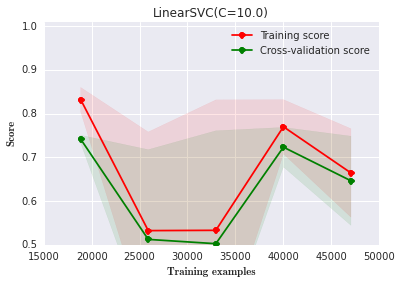

In [39]:
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.5, 1.01),
                    train_sizes=np.linspace(.5, 0.2, 5))

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0. Returning /usr/share/matplotlib/mpl-data/fonts

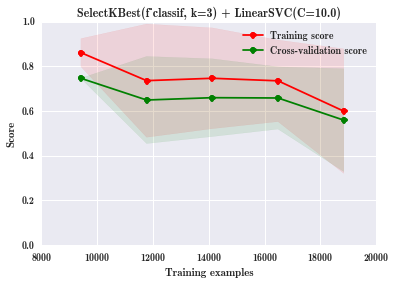

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest(f_classif, k=2) will select the k=2 best features according to their Anova F-value

plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=3)), # select two features
                               ("svc", LinearSVC(C=10.0))]),
                    "SelectKBest(f_classif, k=3) + LinearSVC(C=10.0)",
                    X, y, ylim=(0., 1.0),
                    train_sizes=np.linspace(.1, 0.2, 5))

In [37]:
y[:300]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0,
       0])

Chosen parameter on 100 datapoints: {'C': 0.001}


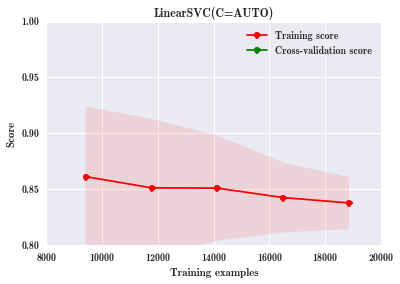

In [19]:
from sklearn.grid_search import GridSearchCV
est = GridSearchCV(LinearSVC(), 
                   param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]})
plot_learning_curve(est, "LinearSVC(C=AUTO)", 
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.1, 0.2, 5))
print "Chosen parameter on 100 datapoints: %s" % est.fit(X[:500], y[:500]).best_params_

In [ ]:
# Ridge algorithm 
plot_learning_curve(LinearSVC(C=0.001, penalty='l2', dual=False), 
                    "LinearSVC(C=0.001, penalty='l2')", 
                    X, y, ylim=(0.5, 1.0),
                    train_sizes=np.linspace(1, 0.2, 5))

In [ ]:
# Ridge Algorithm
est = LinearSVC(C=0.001, penalty='l2', dual=False)
est.fit(X[:17500], y[:17500])  # fit on 150 datapoints
print "Coefficients learned: %s" % est.coef_
print "Non-zero coefficients: %s" % np.nonzero(est.coef_)[1]

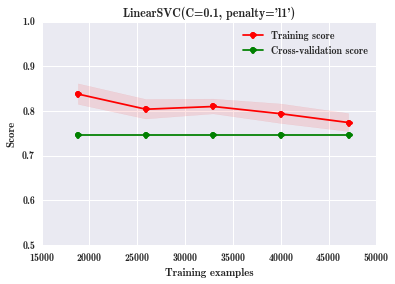

In [23]:
# lasso algorithm 
plot_learning_curve(LinearSVC(C=0.001, penalty='l1', dual=False), 
                    "LinearSVC(C=0.001, penalty='l1')", 
                    X, y, ylim=(0.5, 1.0),
                    train_sizes=np.linspace(1, 0.2, 5))

In [43]:
# Lasso Algorithm
est = LinearSVC(C=0.1, penalty='l1', dual=False)
est.fit(X[:17500], y[:17500])  # fit on 150 datapoints
print "Coefficients learned: %s" % est.coef_
print "Non-zero coefficients: %s" % np.nonzero(est.coef_)[1]

Coefficients learned: [[-0.00612277  0.          0.0024088   0.         -0.0044878   0.
   0.11028319 -0.01262494  0.00012169  0.00016705  0.00015423  0.          0.
   0.          0.          0.        ]]
Non-zero coefficients: [ 0  2  4  6  7  8  9 10]


In [44]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117751 entries, 2015-10-27 10:29:58.457000 to 2015-07-23 20:48:44.954000
Data columns (total 16 columns):
winddir             117751 non-null int64
windspeedmph        117751 non-null float64
windgustmph         117751 non-null float64
windgustdir         117751 non-null int64
windspdmph_avg2m    117751 non-null float64
winddir_avg2m       117751 non-null int64
windgustmph_10m     117751 non-null float64
windgustdir_10m     117751 non-null int64
humidity            117751 non-null float64
tempf               117751 non-null float64
rainin              117751 non-null float64
dailyrainin         117751 non-null float64
baromin             117751 non-null float64
dewptf              117751 non-null float64
batt_lvl            117751 non-null float64
light_lvl           117751 non-null float64
dtypes: float64(12), int64(4)

In [37]:
transformed_data[0:, ::1]

array([[  2.98628000e+01,   4.16000000e+00,   0.00000000e+00, ...,
          4.80000000e+00,   9.00000000e-01,   1.60000000e+00],
       [  2.98926000e+01,   3.99000000e+00,   1.00000000e-02, ...,
          4.80000000e+00,   1.00000000e-01,   0.00000000e+00],
       [  3.02140000e+01,   4.15000000e+00,   0.00000000e+00, ...,
          1.80000000e+00,   3.00000000e-01,   0.00000000e+00],
       ..., 
       [  3.00633000e+01,   4.15000000e+00,   0.00000000e+00, ...,
          4.80000000e+00,   9.00000000e-01,   0.00000000e+00],
       [  3.00058000e+01,   4.11000000e+00,   0.00000000e+00, ...,
          1.45000000e+01,   3.20000000e+00,   4.80000000e+00],
       [  3.01888000e+01,   4.09000000e+00,   0.00000000e+00, ...,
          4.80000000e+00,   7.00000000e-01,   2.90000000e+00]])

Automatically created module for IPython interactive environment


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


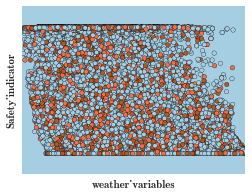

In [31]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X = transformed_data[0:, [4, 5]]  # we only take the first two features.
Y = transformed_labels

h = .02  # step size in the mesh
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('weather_variables')
plt.ylabel('Safety_indicator')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
X, y = transformed_data_train, transformed_labels_train
onevsrest = OneVsRestClassifier(SVC(random_state=0, kernel = 'poly'))
onevsrest = onevsrest.fit(X, y)
output2 = onevsrest.predict(X)

In [ ]:
# Cross Validation
scores = cross_val_score(onevsrest, transformed_data, transformed_labels,  cv = 5)
scores

In [43]:
from sklearn.multiclass import OutputCodeClassifier
clf = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)
clf.fit(X, y).predict(X)

array([0, 2, 2, ..., 0, 0, 0])

In [44]:
# Cross Validation
scores = cross_val_score(clf, transformed_data, transformed_labels,  cv = 5)
scores

array([ 0.74622113,  0.276294  ,  0.5118896 ,  0.52868487,  0.61977154])

ValueError: coef_ is only available when using a linear kernel

Automatically created module for IPython interactive environment


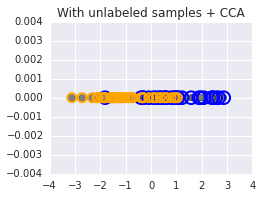

In [46]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

X = transformed_data
Y = transformed_labels


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='poly'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plot_hyperplane(classif.estimators_[2], min_x, max_x, 'k-.',
                    'Boundary\nfor class 3')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

In [1]:
cd /home/tebogo/notebooks/data_ana                       

/home/tebogo/notebooks/data_ana
